## Ben Gurion Aairport Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

In [2]:
import requests
import json


#### Loadding flights data and learning it 

In [3]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")

In [4]:
res = json.loads(r.content)

In [5]:
flights = pd.DataFrame(res['result']['records'])

In [6]:
flights.head(3)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,6H,047,ISRAIR AIRLINES,2023-06-29T14:00:00,2023-06-29T14:46:00,D,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,1,336-341,B,DEPARTED,המריאה
1,2,AZ,806,ITALIA TRASPORTO AEREO,2023-06-29T14:20:00,2023-06-29T14:47:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה
2,3,DL,6672,DELTA AIRLINES,2023-06-29T14:20:00,2023-06-29T14:47:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה


In [7]:
flights.tail(3)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
2807,2808,BZ,888,BLUE BIRD AIRWAYS,2023-07-03T14:40:00,2023-07-03T14:40:00,D,JMK,MIKONOS,מיקונוס,MYKONOS,יוון,GREECE,3,None,None,ON TIME,בזמן
2808,2809,DL,8457,DELTA AIRLINES,2023-07-03T14:40:00,2023-07-03T14:40:00,A,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,None,None,NOT FINAL,לא סופי
2809,2810,6H,251,ISRAIR AIRLINES,2023-07-03T14:40:00,2023-07-03T14:40:00,D,BER,BERLIN BRANDENBURG INTL,ברלין,BERLIN,גרמניה,GERMANY,1,None,None,ON TIME,בזמן


In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   _id       2810 non-null   int64 
 1   CHOPER    2810 non-null   object
 2   CHFLTN    2810 non-null   object
 3   CHOPERD   2810 non-null   object
 4   CHSTOL    2810 non-null   object
 5   CHPTOL    2810 non-null   object
 6   CHAORD    2810 non-null   object
 7   CHLOC1    2810 non-null   object
 8   CHLOC1D   2810 non-null   object
 9   CHLOC1TH  2810 non-null   object
 10  CHLOC1T   2810 non-null   object
 11  CHLOC1CH  2810 non-null   object
 12  CHLOCCT   2810 non-null   object
 13  CHTERM    2810 non-null   object
 14  CHCINT    1187 non-null   object
 15  CHCKZN    1187 non-null   object
 16  CHRMINE   2810 non-null   object
 17  CHRMINH   2810 non-null   object
dtypes: int64(1), object(17)
memory usage: 395.3+ KB


In [9]:
flights.columns

Index(['_id', 'CHOPER', 'CHFLTN', 'CHOPERD', 'CHSTOL', 'CHPTOL', 'CHAORD',
       'CHLOC1', 'CHLOC1D', 'CHLOC1TH', 'CHLOC1T', 'CHLOC1CH', 'CHLOCCT',
       'CHTERM', 'CHCINT', 'CHCKZN', 'CHRMINE', 'CHRMINH'],
      dtype='object')

In [10]:
flights.CHOPER.unique()

array(['6H', 'AZ', 'DL', 'LY', 'SM', 'EJU', 'BA', 'FHM', 'CX', 'HM', 'JU',
       'TK', '6E', 'IZ', 'BZ', 'PC', 'AF', 'BUC', 'SN', 'AC', 'LH', 'NH',
       'UA', 'EY', 'AM', 'VS', 'ET', 'EZY', 'H4', 'OS', 'UX', '5F', 'CY',
       'AA', 'GF', 'AR', 'B6', 'IB', 'TWI', 'EK', 'LX', 'XC', 'AT', 'TO',
       'FR', 'TP', 'I2', 'VY', 'W4', 'MS', 'LO', 'U8', 'AI', 'W6', 'S7',
       'D8', 'A3', 'FB', 'HV', 'WZ', 'W9', 'FZ', 'J2', 'QF', 'TG', 'VN',
       'RO', 'H7', 'MNE', 'KL', 'BT', 'ENT', 'OK', 'QS', 'LA', 'OU', 'RJ',
       'A9', 'A4', 'XQ', '2S', '5W', 'AYT', 'EZS', 'KE', 'AY', '3F', 'KM',
       'FI', 'HU', 'HY', 'XR', 'FH', 'HH'], dtype=object)

In [11]:
flights.CHOPER.nunique()

94

In [12]:
flights.CHOPERD.unique()

array(['ISRAIR AIRLINES', 'ITALIA TRASPORTO AEREO', 'DELTA AIRLINES',
       'EL AL ISRAEL AIRLINES', 'AIR CAIRO', 'EASYJET EUROPE AIRLINE',
       'BRITISH AIRWAYS PLC', 'FREEBIRD AIRLINES EUROPE',
       'CATHAY PACIFIC AIRWAYS', 'AIR SEYCHELLES', 'AIR SERBIA',
       'TURKISH AIRLINES', 'INDIGO AIRLINES', 'ARKIA  ISRAELI  AIRLINES',
       'BLUE BIRD AIRWAYS', 'PEGASUS AIRLINES', 'AIR FRANCE',
       'EUROPEAN AIR CHARTER', 'BRUSSELS AIRLINES', 'AIR CANADA',
       'LUFTHANSA', 'ALL NIPPON AIRWAYS', 'UNITED AIRLINES',
       'ETIHAD AIRWAYS', 'AERO MEXICO', 'VIRGIN ATLANTIC AIRWAYS',
       'ETHIOPIAN AIRLINES', 'EASYJET', 'HISKY EUROPE SRL',
       'AUSTRIAN AIRLINES', 'AIR EUROPA Lineas Aereas S.A.U', 'FLYONE',
       'CYPRUS AIRWAYS', 'AMERICAN AIRLINES', 'GULF AIR - BAHREIN',
       'AEROLINEAS ARGENTINAS S.A.', 'JETBLUE AIRWAYS CORPORATION',
       'IBERIA', 'TAILWIND AIRLINES', 'EMIRATES', 'SWISS INT`L  AIRLINES',
       'CORONDON AIRLINES', 'ROYAL AIR MAROC', 'TRANSAVIA FRANC

In [13]:
flights.CHOPERD.nunique()

94

In [14]:
flights.CHAORD.unique()

array(['D', 'A'], dtype=object)

In [15]:
flights.CHLOC1.nunique()

131

##### Display the first rows 

In [16]:
flights.head(1)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,6H,047,ISRAIR AIRLINES,2023-06-29T14:00:00,2023-06-29T14:46:00,D,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,1,336-341,B,DEPARTED,המריאה


##### Last 10 rows - There is no problem at Flights DF

In [17]:
flights.tail(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
2800,2801,EY,594,ETIHAD AIRWAYS,2023-07-03T14:30:00,2023-07-03T14:30:00,D,AUH,ABU DHABI,אבו דאבי,ABU DHABI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,None,None,ON TIME,בזמן
2801,2802,IZ,097,ARKIA ISRAELI AIRLINES,2023-07-03T14:30:00,2023-07-03T14:30:00,D,HER,HERAKLION,הרקליון,HERAKLION,יוון,GREECE,1,None,None,ON TIME,בזמן
2802,2803,LY,5193,EL AL ISRAEL AIRLINES,2023-07-03T14:30:00,2023-07-03T14:30:00,D,SSH,SHARM EL SHEIKH,שארם אל-שייח,SHARM EL SHEIKH,מצרים,EGYPT,3,None,None,ON TIME,בזמן
2803,2804,LY,9601,EL AL ISRAEL AIRLINES,2023-07-03T14:30:00,2023-07-03T14:30:00,D,AUH,ABU DHABI,אבו דאבי,ABU DHABI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,None,None,ON TIME,בזמן
2804,2805,6H,048,ISRAIR AIRLINES,2023-07-03T14:30:00,2023-07-03T14:30:00,A,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,1,None,None,NOT FINAL,לא סופי
2805,2806,AF,962,AIR FRANCE,2023-07-03T14:40:00,2023-07-03T14:40:00,A,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,None,None,NOT FINAL,לא סופי
2806,2807,BZ,754,BLUE BIRD AIRWAYS,2023-07-03T14:40:00,2023-07-03T14:40:00,D,HER,HERAKLION,הרקליון,HERAKLION,יוון,GREECE,3,None,None,ON TIME,בזמן
2807,2808,BZ,888,BLUE BIRD AIRWAYS,2023-07-03T14:40:00,2023-07-03T14:40:00,D,JMK,MIKONOS,מיקונוס,MYKONOS,יוון,GREECE,3,None,None,ON TIME,בזמן
2808,2809,DL,8457,DELTA AIRLINES,2023-07-03T14:40:00,2023-07-03T14:40:00,A,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,None,None,NOT FINAL,לא סופי
2809,2810,6H,251,ISRAIR AIRLINES,2023-07-03T14:40:00,2023-07-03T14:40:00,D,BER,BERLIN BRANDENBURG INTL,ברלין,BERLIN,גרמניה,GERMANY,1,None,None,ON TIME,בזמן


##### Percentage of Nulls for each columns 

In [18]:
flights.isnull().sum()

_id            0
CHOPER         0
CHFLTN         0
CHOPERD        0
CHSTOL         0
CHPTOL         0
CHAORD         0
CHLOC1         0
CHLOC1D        0
CHLOC1TH       0
CHLOC1T        0
CHLOC1CH       0
CHLOCCT        0
CHTERM         0
CHCINT      1623
CHCKZN      1623
CHRMINE        0
CHRMINH        0
dtype: int64

In [19]:
flights.isnull()

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
2806,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
2807,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
2808,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [20]:

flights.isnull().sum() * 100 / len(flights)


_id          0.000000
CHOPER       0.000000
CHFLTN       0.000000
CHOPERD      0.000000
CHSTOL       0.000000
CHPTOL       0.000000
CHAORD       0.000000
CHLOC1       0.000000
CHLOC1D      0.000000
CHLOC1TH     0.000000
CHLOC1T      0.000000
CHLOC1CH     0.000000
CHLOCCT      0.000000
CHTERM       0.000000
CHCINT      57.758007
CHCKZN      57.758007
CHRMINE      0.000000
CHRMINH      0.000000
dtype: float64

##### Dropping rows that have Null

In [21]:
flights.dropna(inplace = True)

In [22]:
flights.shape


(1187, 18)

##### Format current day 

In [23]:
current_date = dt.datetime.now().strftime("%d_%m_%y")
print("Today =", current_date)

Today = 30_06_23


##### Drop ID column

In [24]:
flights.drop('_id', axis=1, inplace=True)

##### Saving into csv file 

In [25]:
filename = current_date+ ' ' + 'Flights' + '.csv'
flights.to_csv(filename, index=False)

##### Display only airline code and name columns without duplicates

In [26]:
airline_df = flights[['CHOPER','CHOPERD']].drop_duplicates()


In [27]:
airline_df

,CHOPER,CHOPERD
0,6H,ISRAIR AIRLINES
3,LY,EL AL ISRAEL AIRLINES
4,SM,AIR CAIRO
6,EJU,EASYJET EUROPE AIRLINE
9,CX,CATHAY PACIFIC AIRWAYS
...,...,...
1247,FI,ICELAND AIR
1782,S7,SIBERIA AIRLINES
1849,HY,UZBEKISTAN AIR
1881,FH,FREEBIRD AIRLINES


##### Download airlines

In [29]:
os.chdir ('C:\\python\\pandas')
airlines = pd.read_csv ('airlines.csv')

In [30]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CHOPER   100 non-null    object
 1   CHOPERD  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


##### merge and save airline DF to file 

In [31]:
airlines =  pd.concat ([airlines,airline_df])

In [32]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 2058
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CHOPER   190 non-null    object
 1   CHOPERD  190 non-null    object
dtypes: object(2)
memory usage: 4.5+ KB


In [33]:
filename = current_date + ' ' + 'Airlines' + '.csv'
airlines.to_csv(filename, index=False)

##### Droping Airline name column

In [34]:
flights = flights.drop('CHOPERD', axis=1)

In [35]:
flights.columns

Index(['CHOPER', 'CHFLTN', 'CHSTOL', 'CHPTOL', 'CHAORD', 'CHLOC1', 'CHLOC1D',
       'CHLOC1TH', 'CHLOC1T', 'CHLOC1CH', 'CHLOCCT', 'CHTERM', 'CHCINT',
       'CHCKZN', 'CHRMINE', 'CHRMINH'],
      dtype='object')

##### Airport - same task 

In [36]:
airport_df = flights[['CHLOC1','CHLOC1D']].drop_duplicates()
airport_df.head (3)

,CHLOC1,CHLOC1D
0,ETM,RAMON
3,LTN,LUTON
4,SSH,SHARM EL SHEIKH


In [37]:
airport = pd.read_csv ('airports.csv')
airport.head (3)

,CHLOC1,CHLOC1D
0,SAW,ISTANBUL-SABIHA GOKCHEN
1,PRG,PRAGUE-RUZYNE
2,IST,ISTANBUL


In [38]:
airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CHLOC1   165 non-null    object
 1   CHLOC1D  165 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


In [39]:
airport =  pd.concat ([airport,airport_df])
airport.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 2058
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CHLOC1   292 non-null    object
 1   CHLOC1D  292 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB


##### Droping Hebrew columns 

In [40]:
flights = flights.drop (['CHLOC1CH' , 'CHLOC1TH' , 'CHRMINH' ],axis=1)

In [41]:
flights.head(3)

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1T,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE
0,6H,047,2023-06-29T14:00:00,2023-06-29T14:46:00,D,ETM,RAMON,RAMON,ISRAEL,1,336-341,B,DEPARTED
3,LY,313,2023-06-29T14:30:00,2023-06-29T14:52:00,D,LTN,LUTON,LONDON LUTON,UNITED KINGDOM,3,78-99,D,DEPARTED
4,SM,3002,2023-06-29T13:55:00,2023-06-29T14:54:00,D,SSH,SHARM EL SHEIKH,SHARM EL SHEIKH,EGYPT,3,G22-G24,G,DEPARTED


##### Columns rename 

In [42]:
flights.columns

Index(['CHOPER', 'CHFLTN', 'CHSTOL', 'CHPTOL', 'CHAORD', 'CHLOC1', 'CHLOC1D',
       'CHLOC1T', 'CHLOCCT', 'CHTERM', 'CHCINT', 'CHCKZN', 'CHRMINE'],
      dtype='object')

In [43]:
flights = flights.rename (columns = {'CHOPER':'Airline',         'CHFLTN':'FlightNum' ,
                                     'CHSTOL':'PlanTime',        'CHPTOL': 'ActualTime',
                                     'CHAORD':'Direction',       'CHLOC1': 'Airport',
                                     'CHLOC1D': 'Airport Name',  'CHLOC1T': 'City',
                                     'CHLOCCT': 'Country' ,      'CHTERM': 'Terminal',
                                     'CHCINT': 'Sleeve',         'CHCKZN': 'Landing strip',
                                     'CHRMINE':'Status' })

In [44]:
flights.columns

Index(['Airline', 'FlightNum', 'PlanTime', 'ActualTime', 'Direction',
       'Airport', 'Airport Name', 'City', 'Country', 'Terminal', 'Sleeve',
       'Landing strip', 'Status'],
      dtype='object')

##### Changes datetime type

In [45]:
flights.PlanTime = pd.to_datetime(flights.PlanTime)
flights.ActualTime = pd.to_datetime(flights.ActualTime)

In [46]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1187 entries, 0 to 2390
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Airline        1187 non-null   object        
 1   FlightNum      1187 non-null   object        
 2   PlanTime       1187 non-null   datetime64[ns]
 3   ActualTime     1187 non-null   datetime64[ns]
 4   Direction      1187 non-null   object        
 5   Airport        1187 non-null   object        
 6   Airport Name   1187 non-null   object        
 7   City           1187 non-null   object        
 8   Country        1187 non-null   object        
 9   Terminal       1187 non-null   object        
 10  Sleeve         1187 non-null   object        
 11  Landing strip  1187 non-null   object        
 12  Status         1187 non-null   object        
dtypes: datetime64[ns](2), object(11)
memory usage: 129.8+ KB


##### Saving DF to Clean Data file

In [47]:
filename = current_date+ ' ' + 'Clean' + '.csv'
flights.to_csv(filename, index=False)

##### Preparing Final data and save as new file 

In [48]:
final = pd.read_csv ('final.csv')
final.columns 

Index(['Airline', 'FlightNum', 'PlanTime', 'ActualTime', 'Direction',
       'Airport', 'City', 'Country', 'Terminal', 'Status'],
      dtype='object')

In [49]:
flights.columns

Index(['Airline', 'FlightNum', 'PlanTime', 'ActualTime', 'Direction',
       'Airport', 'Airport Name', 'City', 'Country', 'Terminal', 'Sleeve',
       'Landing strip', 'Status'],
      dtype='object')

In [50]:
flights = flights.drop (['Airport Name' , 'Sleeve' , 'Landing strip' ],axis=1)

In [51]:
flights.columns

Index(['Airline', 'FlightNum', 'PlanTime', 'ActualTime', 'Direction',
       'Airport', 'City', 'Country', 'Terminal', 'Status'],
      dtype='object')

In [52]:
flights.Status.values

array(['DEPARTED', 'DEPARTED', 'DEPARTED', ..., 'ON TIME', 'ON TIME',
       'ON TIME'], dtype=object)

In [53]:
final_df = flights[flights.Status.isin(['LANDED', 'CANCELED'])]

In [54]:
final_df

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status
119,5F,448,2023-06-29 17:40:00,2023-06-29 17:40:00,D,KIV,CHISINAU,MOLDOVA,3,CANCELED
148,IZ,1801,2023-06-29 18:20:00,2023-06-29 18:20:00,D,ETM,RAMON,ISRAEL,1,CANCELED
249,EZY,2262,2023-06-29 21:00:00,2023-06-29 21:00:00,D,MAN,MANCHESTER,UNITED KINGDOM,1,CANCELED


In [55]:
final.shape

(658, 10)

In [56]:
final =  pd.concat ([final,final_df])

In [57]:
final.shape

(661, 10)

In [58]:
filename = current_date+ ' ' + 'final' + '.csv'
final.to_csv(filename, index=False)

##### Add a new column for total delay in minutes

In [59]:
flights['difference_minutes'] = ( flights.ActualTime - flights.PlanTime).dt.total_seconds() / 60

In [60]:
flights.head (3)

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,difference_minutes
0,6H,047,2023-06-29 14:00:00,2023-06-29 14:46:00,D,ETM,RAMON,ISRAEL,1,DEPARTED,46.0
3,LY,313,2023-06-29 14:30:00,2023-06-29 14:52:00,D,LTN,LONDON LUTON,UNITED KINGDOM,3,DEPARTED,22.0
4,SM,3002,2023-06-29 13:55:00,2023-06-29 14:54:00,D,SSH,SHARM EL SHEIKH,EGYPT,3,DEPARTED,59.0


##### Average delay for departed flights

In [61]:
flights [ flights.Status == 'DEPARTED'].difference_minutes.mean()

41.84974093264249

#####  Total delay for Airlines , Terminals, Date

In [62]:
delay_distribution = flights.groupby(['Airline', 'Terminal'])['difference_minutes'].sum().to_frame()

In [63]:
delay_distribution.head(3)

,,difference_minutes
Airline,Terminal,
2S,3,64.0
5F,3,0.0
5W,3,98.0


In [64]:
delay_distribution.difference_minutes.nlargest()

Airline  Terminal
LY       3           2079.0
BZ       3            923.0
6H       3            850.0
IZ       1            696.0
         3            642.0
Name: difference_minutes, dtype: float64

In [65]:
delay_distribution.difference_minutes.nsmallest()

Airline  Terminal
5F       3           0.0
AY       3           0.0
AYT      3           0.0
FH       3           0.0
FI       3           0.0
Name: difference_minutes, dtype: float64

## Create 3 diffrent visualizations with your analyzation

In [66]:
flights.describe()

,PlanTime,ActualTime,difference_minutes
count,1187,1187,1187.000000
mean,2023-07-01 08:08:39.376579584,2023-07-01 08:23:59.191238400,15.330244
min,2023-06-29 13:55:00,2023-06-29 14:46:00,0.000000
25%,2023-06-30 08:00:00,2023-06-30 08:45:30,0.000000
50%,2023-07-01 10:00:00,2023-07-01 10:00:00,0.000000
75%,2023-07-02 07:50:00,2023-07-02 07:50:00,24.000000
max,2023-07-03 01:20:00,2023-07-03 01:20:00,331.000000
std,NaN,NaN,28.964864


In [67]:
flights.columns

Index(['Airline', 'FlightNum', 'PlanTime', 'ActualTime', 'Direction',
       'Airport', 'City', 'Country', 'Terminal', 'Status',
       'difference_minutes'],
      dtype='object')

#### Is there a connection between the airlines and delay times 

checking delay precantuge  on each airlaine

In [68]:

airline_flights = flights.Airline.value_counts().to_frame().reset_index()
airline_flights.columns = ['Airline', 'TotalFlights'] ## Total flights for each airlain
delay_flights  = flights [flights.difference_minutes != 0].Airline.value_counts().to_frame().reset_index()
delay_flights.columns = ['Airline', 'DelayFlights'] ##  Flights had delay for each airlain

##airline_flights ['delay flights'] = x
##airline_flights .head (50)

In [69]:
delay_flights.shape

(80, 2)

In [70]:
airline_flights.shape

(90, 2)

In [71]:
merged_df = airline_flights.merge(delay_flights, on='Airline',how='left',sort=True)
merged_df.fillna(0, inplace = True)
merged_df = merged_df.sort_values('DelayFlights')

In [72]:
merged_df.corr(numeric_only=True)


,TotalFlights,DelayFlights
TotalFlights,1.000000,0.981288
DelayFlights,0.981288,1.000000


In [73]:
merged_df.describe() ## checking standard deviation

,TotalFlights,DelayFlights
count,90.000000,90.000000
mean,13.188889,4.655556
std,22.102872,9.038197
min,1.000000,0.000000
25%,3.000000,1.000000
50%,6.000000,2.000000
75%,14.000000,5.000000
max,177.000000,77.000000


In [74]:
flights.difference_minutes.value_counts()

difference_minutes
0.0      768
18.0      21
40.0      17
21.0      16
27.0      16
        ... 
302.0      1
90.0       1
78.0       1
52.0       1
120.0      1
Name: count, Length: 90, dtype: int64

In [75]:
merged_df['Airline_delay_percentage'] = merged_df.DelayFlights/merged_df.TotalFlights*100
merged_df['Flight_delay_percentage'] = merged_df.DelayFlights*100/87

delay = len (flights [flights ['difference_minutes'] == 0.0])
on_time = len (flights [flights ['difference_minutes'] != 0.0])
pie = [delay , on_time]
label = ['Delayed flights'  , 'Flights On_time']

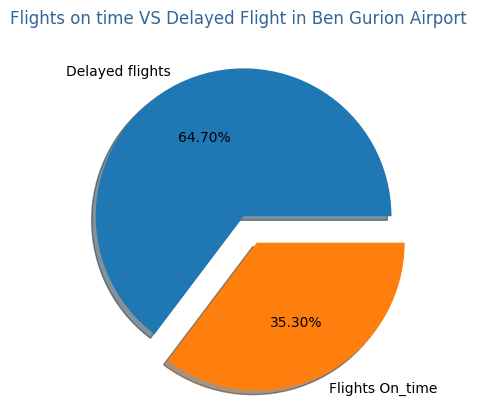

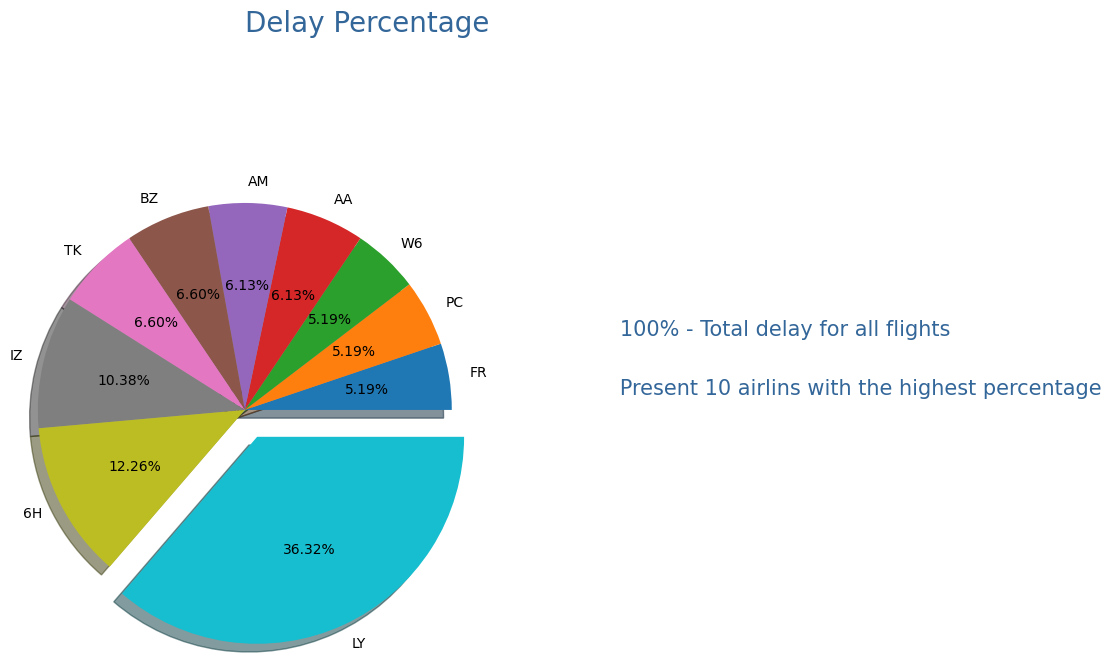

In [76]:

## first pie 
plt.pie ( pie , 
         autopct ='%1.2f%%', shadow = True , explode = (0,0.2) , labels = label)

plt.title("Flights on time VS Delayed Flight in Ben Gurion Airport  ", color = (0.2, 0.4, 0.6),fontsize = 12 )

plt.show()

##secound pie
plt.pie (merged_df['Flight_delay_percentage'].tail(10) , 
         autopct ='%1.2f%%',  shadow = True   , 
        explode = (0,0,0,0,0,0,0,0,0,0.1),
        labels = merged_df.Airline.tail(10),radius=0.7)
plt.title("Delay Percentage",loc='left', color=(0.2, 0.4, 0.6), fontsize=20)

explanations = ['   Present 10 airlins with the highest percentage','',
                '   100% - Total delay for all flights']
for i, expl in enumerate(explanations):
    plt.annotate(expl, (1.2, 0.05 + 0.1*i), fontsize = 15, color = (0.2, 0.4, 0.6))
    

xycoords='axes fraction'
plt.axis(xmin = 0, ymin = 0)

plt.show()

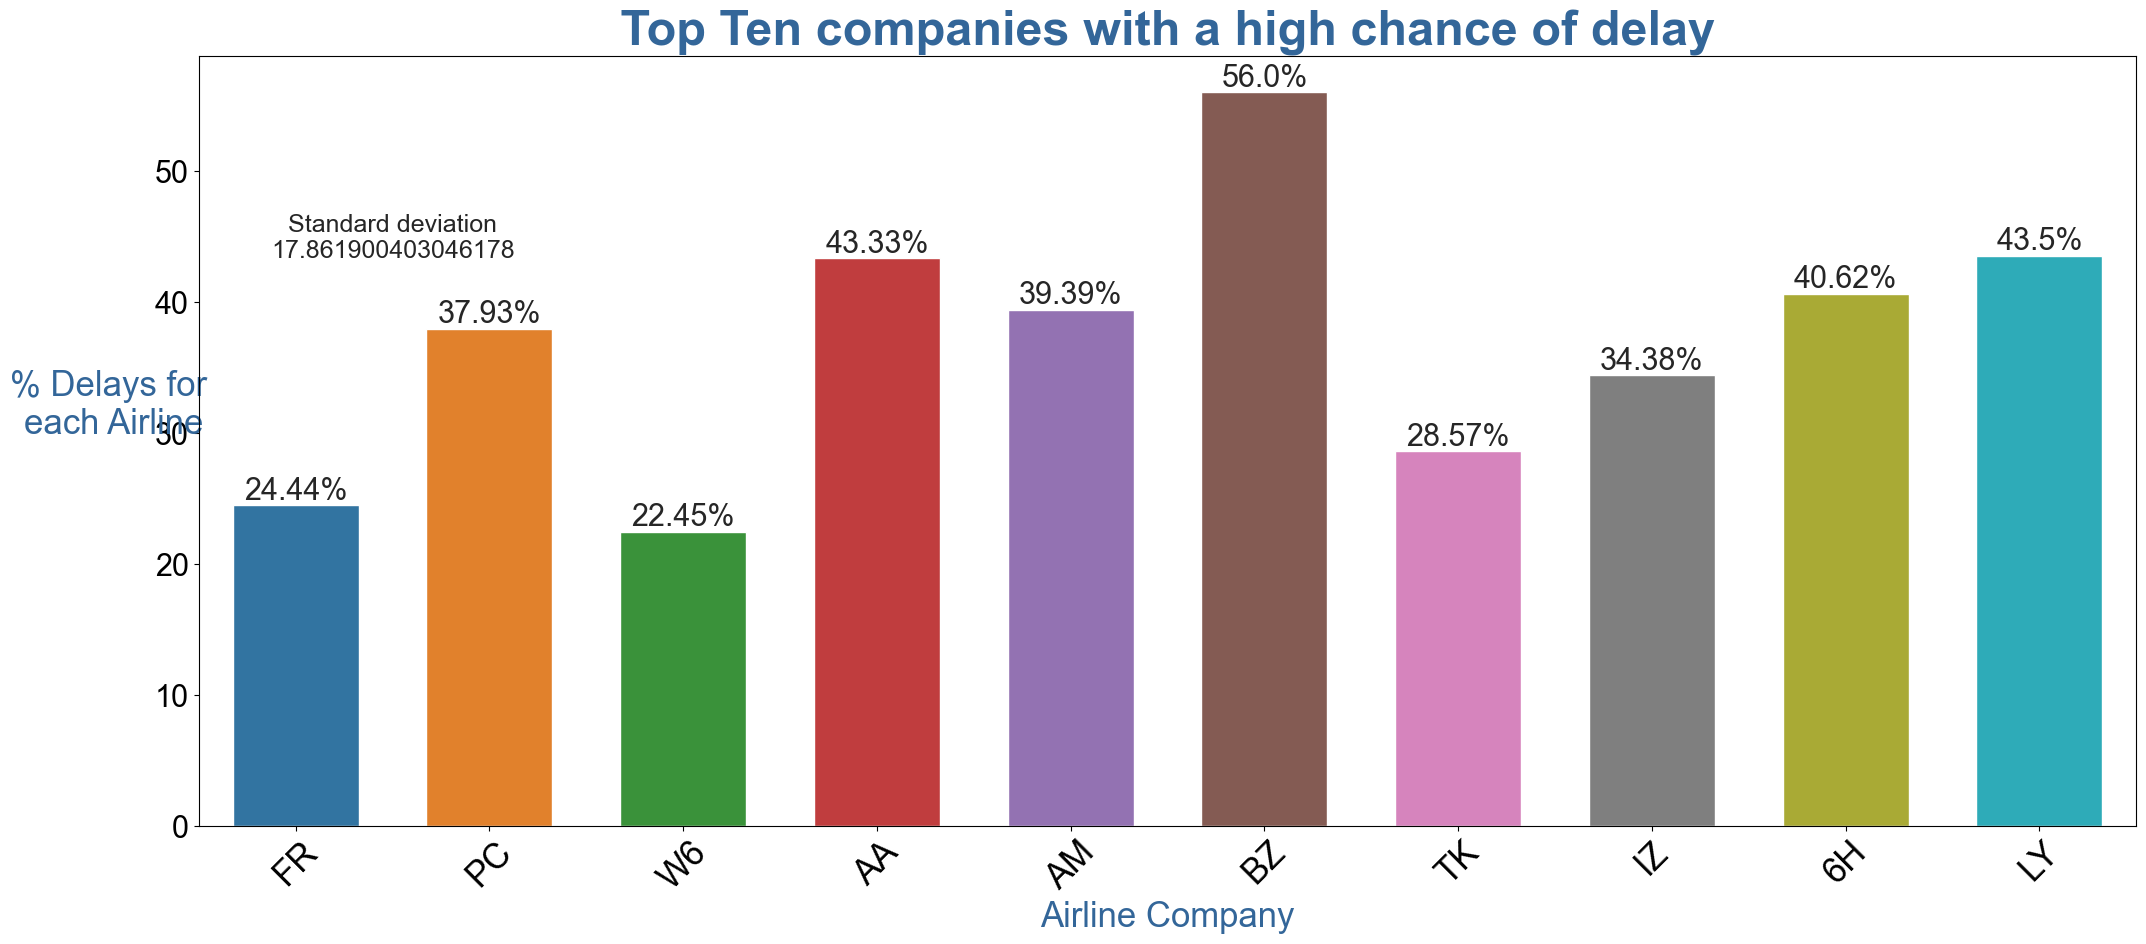

In [77]:
plt.figure(figsize = (25,10))

plt.title(" Top Ten companies with a high chance of delay ", 
          color = (0.2, 0.4, 0.6),fontsize = 35, fontweight = 'bold' )

sb.set_style ("whitegrid")



sb.barplot (x = merged_df.Airline.tail(10) , 
            y = merged_df.Airline_delay_percentage,
            errcolor = (0.2, 0.4, 0.6), width = 0.65 )

plt.text( x=0.5 , y=45 ,s = 'Standard deviation',ha='center',fontsize = 18 ,va='bottom' )      
plt.text( x=0.5 , y=43 ,s = merged_df.Airline_delay_percentage.std() ,ha='center',fontsize = 18 ,va='bottom' )


x = merged_df.Airline.tail(10).to_frame().reset_index(drop = True)
y = merged_df.Airline_delay_percentage.tail(10).to_frame().reset_index(drop = True)
for i in range(len(x)):
   plt.text( x.index[i],
            y.Airline_delay_percentage[i],
           str( round (y.Airline_delay_percentage[i],2))+'%',
            ha='center',fontsize = 22 ,va='bottom') 

     
plt.xlabel ('Airline Company',color = (0.2, 0.4, 0.6) , fontsize = 25)
plt.ylabel ('% Delays for \neach Airline',color = (0.2, 0.4, 0.6), fontsize = 25, rotation = 0, labelpad=30 )
plt.xticks(fontsize=25, rotation=45) 
plt.yticks(fontsize=22)  
plt.show()